<a href="https://colab.research.google.com/github/mariakuria/Comparison-of-NLP-models/blob/main/BagOfWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP For Finance: Exploration and Basic Models**

In [1]:
#@title Setting up the libraries and downloading the dataset { display-mode: "form" }
# Run this every time you open the spreadsheet
import nltk
nltk.download('punkt_tab')
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 100)
from sklearn.feature_extraction.text import CountVectorizer


nltk.download('wordnet')

# gdown.download('https://drive.google.com/uc?id=1q4U2gVY9tWEPdT6W-pdQpKmo152QqWLE', 'finance_train.csv', True)
# gdown.download('https://drive.google.com/uc?id=1nIBqAsItwVEGVayYTgvybz7HeK0asom0', 'finance_test.csv', True)

!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

def plot_word_cloud(text):
  text = text.Sentence.values
  wordcloud = WordCloud(
      width = 3000,
      height = 2000,
      background_color = 'black',
      stopwords = STOPWORDS).generate(str(text))
  fig = plt.figure(
      figsize = (10, 7),
      facecolor = 'k',
      edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

def preprocess_data(df):
  sentences = df.Sentence.values
  labels = df.Label.values
  tokenized_sentences = [word_tokenize(word) for word in sentences]
  filtered_sentences = [remove_stopwords(word) for word in tokenized_sentences]
  return filtered_sentences, labels

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(14,12))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()

LABEL_MAP = {0 : "negative", 1 : "neutral", 2 : "positive"}
STOPWORD_SET = set(stopwords.words('english'))
SAMPLE_SENTENCE = word_tokenize('I need to remove all these meaningless stopwords.')
SAMPLE_SOLUTION = ['I', 'need', 'remove', 'meaningless', 'stopwords', '.']


print ("Train & Test Files are loaded")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


ModuleNotFoundError: No module named 'imp'

# Applying NLP pre-processing techniques to filter datasets.**

#### **Dataset Analysis**

Two datasets: a train set and a test set. **Finance Train** contains all the raw input sentences and their sentiment labels. **Finance Test** contains a set of raw input sentences that we would like to predict the sentiment of.

Using the existing `get_finance_train()` function to obtain a `pandas` dataframe for **Finance Train** of input sentences and save it in a variable named `df_train`.

In [ ]:
df_train = get_finance_train()
df_train.head()

,Sentence,Label
0,Autotank Group is part of Aspo 's Systems Division .,1
1,"The contract includes design , construction , delivery of equipment , installation and commissio...",1
2,Rapala said it estimates it will make savings of 1-2 mln eur a year by centralising its French o...,2
3,"The share capital of Alma Media Corporation (business ID 1944757-4)is EUR 45,031,513.80 and it i...",1
4,The financial impact is estimated to be some 1.5 MEUR annual improvement in the division 's resu...,2


In [ ]:
df_test = get_finance_train()
df_test.head()

,Sentence,Label
0,Autotank Group is part of Aspo 's Systems Division .,1
1,"The contract includes design , construction , delivery of equipment , installation and commissio...",1
2,Rapala said it estimates it will make savings of 1-2 mln eur a year by centralising its French o...,2
3,"The share capital of Alma Media Corporation (business ID 1944757-4)is EUR 45,031,513.80 and it i...",1
4,The financial impact is estimated to be some 1.5 MEUR annual improvement in the division 's resu...,2


In [ ]:
print(len(df_train))

2037


In [ ]:
print(len(df_test))

2037


Giving concrete mappings to our labels such that we may properly interpret the sentiment moving forward. Using a python object known as a `dictionary` to hold the association between each numeric label and its sentiment correlation and it will be saved in a variable named `LABEL_MAP`.

In [ ]:
print(LABEL_MAP)

{0: 'negative', 1: 'neutral', 2: 'positive'}


Visualizing the class distribution (positive, negative, or neutral) for the news sentences in our training data!

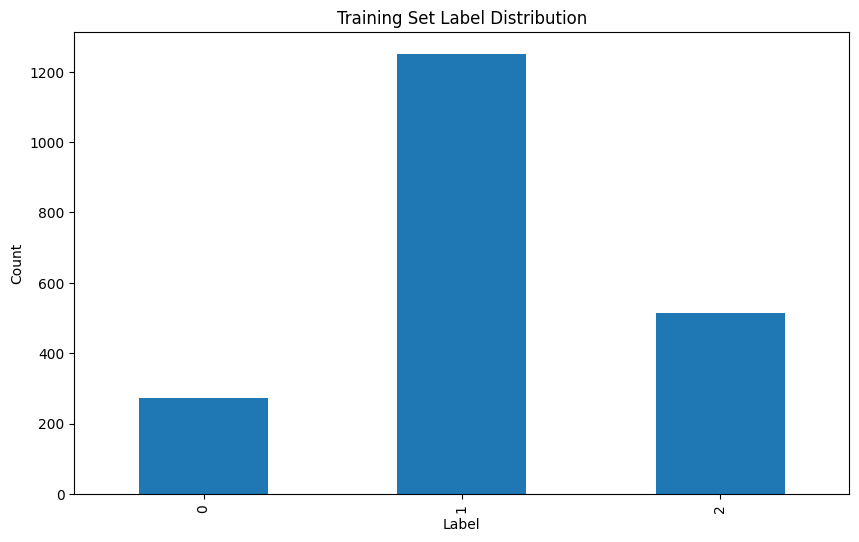

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.title('Training Set Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')

df_train.groupby('Label').Sentence.count().plot.bar(ylim=0)

plt.show()

Creating a word cloud of all the sentences labeled with a negative sentiment! First we obtain all the sentences from the dataset that have a negative label. (we want sentences with `Label` equal to `0`). Filter the original `df_train` dataframe to obtain all the sentences with a negative label. After filtering, save the result in a variable named `negative_data`.


In [ ]:
 negative_data = df_train[df_train['Label'] == 0]


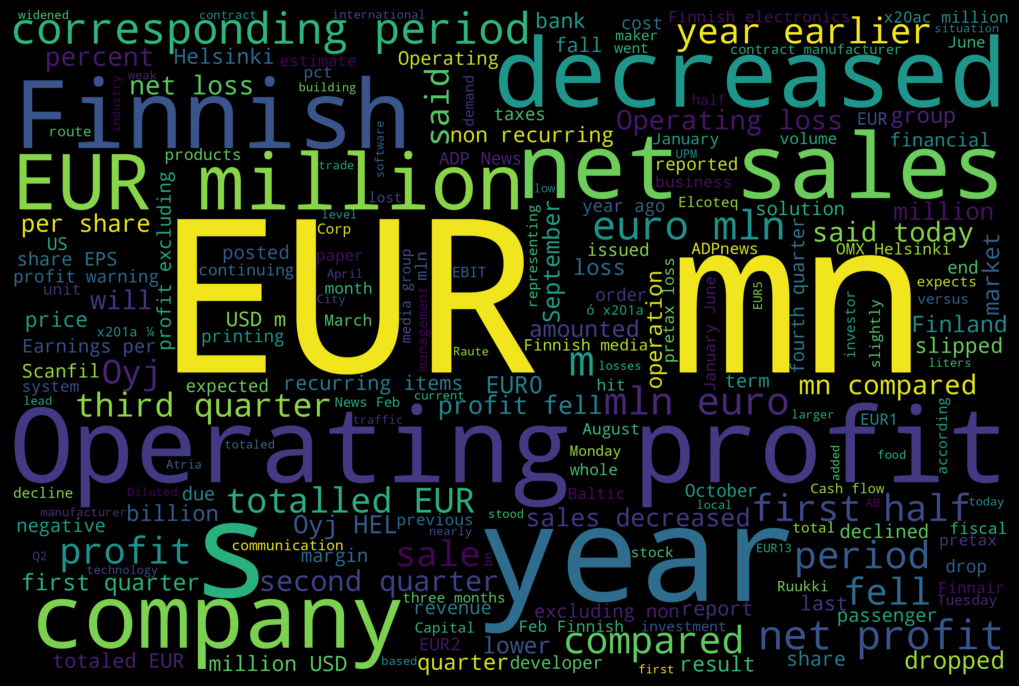

In [ ]:
plot_word_cloud(negative_data)

In [ ]:
positive_data = df_train[df_train['Label'] == 2]

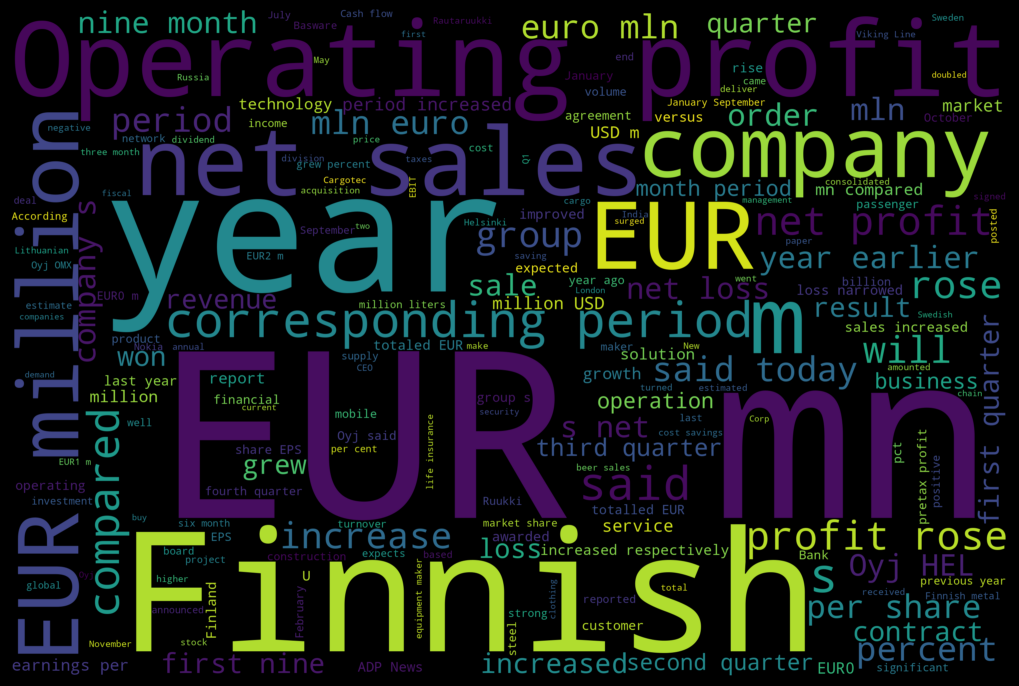

In [ ]:
plot_word_cloud(positive_data)

### **Sentiment Analysis for Stock Prediction**

The price of stocks fluctuate rapidly and are influenced dramatically by social media platforms. If there is positive or motivating news regarding a stock, many people may invest in it and cause price increases. Whereas if there is negative sentiment regarding a stock, peoples' investing patterns may cause the price to decrease!

A recent example is the monumental fluctuation in the stock price of GameStop Corp. (`GME`) influenced by Reddit. A movement started to increase the stock price and the resulting rhetoric, sentiment, and motivation urged thousands to join in and cause these massive changes as you can read more about [here](https://www.cnn.com/2021/01/30/business/gamestop-reddit-rebellion-explained/index.html).

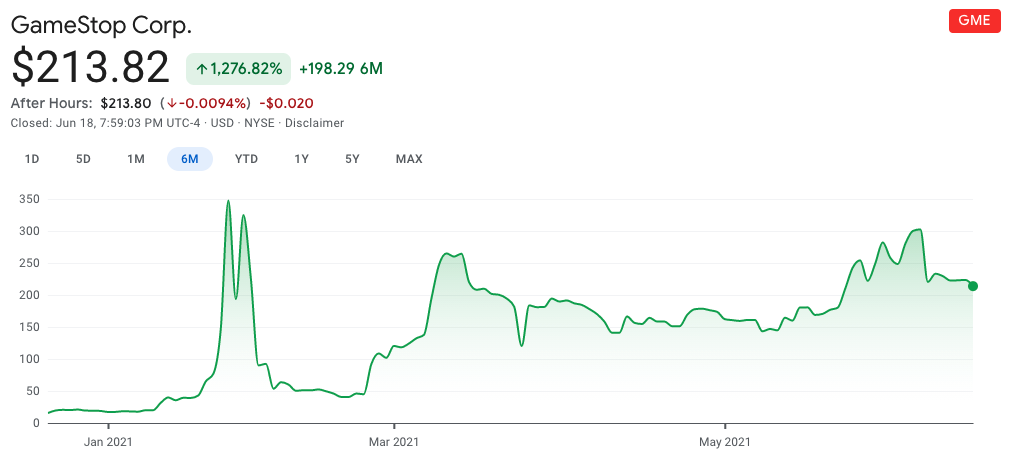

Stock price prediction using sentiment analysis is a well explored field, as you can read more about [here](https://medium.com/vsinghbisen/how-sentiment-analysis-in-stock-market-used-for-right-prediction-5c1bfe64c233). Before we can effectively create models to predict stock prices using sentiment analysis, we need to be able to accurately analyze sentiment of financial news.

## Text Preprocessing

A signficant part of machine learning model development is properly filtering and processing data for use. The realm of NLP is especially prevalent with techniques to filter and clean text data in a variety of beneficial ways. We will apply the techniques of **Tokenization**, **Stemming**, and **Stopword Removal**.

#### **Tokenization**

Tokenization is the process of splitting a string of text into a list of objects. We would like to split the sentences into these objects, which are words or punctuation, before proceeding with the analysis.


In [ ]:
#@title Tokenizing
sentence = "OpenAI is something you should invest in\"" #@param {type:'string'}
tokens = word_tokenize(sentence)
tokens

['OpenAI', 'is', 'something', 'you', 'should', 'invest', 'in', "''"]

#### **Stemming**


Stemming in NLP is the process of removing prefixes and suffixes from words so that they are reduced to simpler forms called stems.


#### **Stopword Removal**

Stopwords are English words that appear in several contexts, such as 'at', 'is', 'the', and so on. In NLP, it is usually advantageous to ignore these words, since they may add noise or cause numerical issues—and since they appear in *every* context, ignoring them will not impact the meaning of the sentence.


`STOPWORD_SET` already created

In [ ]:
print(STOPWORD_SET)

{'did', 'once', 'which', 'here', 'any', "we'd", 'hers', 'herself', "i've", 'll', 'be', 'because', 'wouldn', 'just', "i'd", "needn't", "i'll", "weren't", 'from', 'at', 'the', 'shan', 'ma', 'him', 'mustn', "don't", "haven't", "she'd", 'and', 'you', 'under', "should've", "couldn't", 'in', 'myself', "hadn't", 'so', 'this', "won't", 'ain', 'each', "it's", 'for', 'nor', 'ourselves', 'most', 'some', "you'd", 'having', 'only', 'through', 'when', 'yourself', "shan't", 'me', 'of', 'now', 'again', "doesn't", "isn't", 'whom', 'will', "it'll", 'such', 'couldn', "she's", 'am', 'until', "we've", 'all', 'had', "he'd", 'out', 'have', 'doing', 'she', 'a', 'theirs', 'haven', 'hadn', 'i', 'weren', 'd', 'if', 'same', 'too', "mightn't", 'against', 'further', "hasn't", 'how', "it'd", 'they', 'who', 'it', 'y', 'these', 'them', 'about', 'being', 'after', 'above', 'down', 'mightn', 'those', 'hasn', 'off', 'other', 'with', 'itself', 'very', 'does', 'but', 'what', 'should', 'why', "mustn't", "they've", 'we', 'bet

**Experiment with stop-words below!** Write any word you'd like and check to see if it is a stopword or not!

Now we use **Tokenization**, **Stemming**, and **Stopword Removal** to filter our training and testing datasets. To start, we create a function named `remove_stopwords(sentence)` that takes a single tokenized sentence (list of token objects) and returns a new filtered list with all the stopwords removed. To make the filtration process possible, we will use the already created `STOPWORD_SET`, a list of all the stopwords in the English language.


In [ ]:
def remove_stopwords(tokenized_sentence):
  filtered_sentence = []

  for word in tokenized_sentence:
    if word not in STOPWORD_SET:
      filtered_sentence.append(word)

  return filtered_sentence

In [ ]:
remove_stopwords(df_train)

Now, we will apply the filtration to our entire training and testing datasets! To do so, call the `preprocess_data(DATA)` function passing in `df_train` for data. This function will return a list of all the filtered sentences and their respective labels: so, save this result two variables named `train_sentences` and `train_labels`. Thereafter, print the first few elements of `train_sentences` to assess your preprocessing!

In [ ]:
train_sentences, train_labels = preprocess_data(df_train)

Similarly we preprocess our test data and save the result in a variable named `test_sentences`.

In [ ]:
test_sentences, test_labels = preprocess_data(df_test)

For bag of words, we will use a simple and quick-to-implement model to analyze our financial news sentences: Logistic Regression!

Bag of Words is a manner of transforming text into computational data by recording the frequency of words. This process is referred to as vectorization.

To carry out Bag-of-Words, we will be using an object known as a `CountVectorizer` from the `sklearn` library. A `CountVectorizer` is used to convert a collection of text (in our case, a list of financial news sentences) into a vector of word counts. It also enables us to ​pre-process our text before turning it into a vector. This makes `CountVectorizer` a highly flexible way to represent text as numerical input.

In [ ]:
# List of sentences
all_sentences = ["Google AI made remarkable achievements in 2019.", "Google Stock was at its all time high"]

#Creating instance of CountVectorizer() object
vectorizer = CountVectorizer()

`CountVectorizer`'s `.fit()` method learns about the text (its length, vocabulary, etc.).

In [ ]:
# Tokenizes the text and builds the vocabulary
vectorizer.fit(all_sentences)

`CountVectorizer`'s `.transform()` method turns the sentences into their Bag-of-Words vector representations.

In [ ]:
# Encode sentences as a vectors
bag_of_words_matrix = vectorizer.transform(all_sentences).toarray()

# Print vectors
print(bag_of_words_matrix)

## Logistic Regression for Sentiment Classification

Now we will piece together our preprocessing techniques to create and run our model!

#### **Training our model!**

Vectorize your data below using the `CountVectorizer`. Thereafter, train a `LogisticRegression()` passing in your training data matrix and labels.

In [ ]:
def train_model(train_sentences, train_labels):
  train_sentences = [" ".join(t) for t in train_sentences]
  train_labels = [l for l in train_labels]

  # vectorizer = initialize CountVectorizer
  vectorizer = CountVectorizer()

  # train_vect = get the vector representation of train_sentences using the .fit() and .transform() methods
  vectorizer.fit(train_sentences)
  train_vect = vectorizer.transform(train_sentences)

  # model = initialize a Logistic Regression model
  model = LogisticRegression()

  # Train with train_vect and train_labels using the .fit() method of LogisticRegression
  model.fit(train_vect, train_labels)


  return model, vectorizer

In [ ]:
model, train_vectorizer = train_model(test_sentences, test_labels)

#### **Testing our model**

Code below gets the vector representation of the test sentences and evaluate the accuracy of the model.

In [ ]:
def predict(test_sentences, test_labels, vectorizer, model):
  test_sentences = [" ".join(t) for t in  test_sentences]

  # test_vect = get the vector representation of test_sentences using vectorizer's .transform method (no need to use .fit!)
  test_vect = vectorizer.transform(test_sentences)

  # preds = predict the labels of test_sentences using the model's predict method on test_vect
  preds = model.predict(test_vect)


  acc = metrics.accuracy_score(test_labels, preds)
  return preds, acc

In [ ]:
y_predictions, test_accuracy = predict(test_sentences, test_labels, train_vectorizer, model)



```
# This is formatted as code
```
Assessing and visualizing our results using a confusion matrix

In [ ]:
plot_confusion_matrix(test_labels, y_predictions)
print(test_accuracy)